## Libraries & Dataset

For creating this chart, we will need to load the following libraries:

- [matplotlib](/matplotlib) for creatin the chart
- [pandas](/pandas) for loading the dataset
- [pypalettes](/color-palette-finder/) for the color palette
- [highlight_text](/advanced-custom-annotations-matplotlib) for custom annotations
- `squarify` for creating the treemap


In [1]:
# load libraries
import squarify # pip install squarify (algorithm for treemap)
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import pandas as pd
from highlight_text import fig_text

# set a higher resolution
plt.rcParams['figure.dpi'] = 300

df = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/simple-treemap.csv")
df

,type,name,value,parent
0,leaf,Mark,90,Team Dataviz
1,leaf,Robert,12,Team Dataviz
2,leaf,Emily,34,Team Dataviz
3,leaf,Marion,53,Team Dataviz
4,leaf,Nicolas,98,Team DevOps
5,leaf,Malki,22,Team DevOps
6,leaf,Djé,12,Team DevOps
7,leaf,Mélanie,45,Team Sales
8,leaf,Einstein,76,Team Sales


## Simple treemap

The `plot()` function from `squarify` works mainly with 3 arguments:
- `sizes`: a list of values that will be represented by the **area of the squares**
- `label`: a list of labels to display **on the squares**
- `ax`: the **matplotlib axes** where to plot the treemap



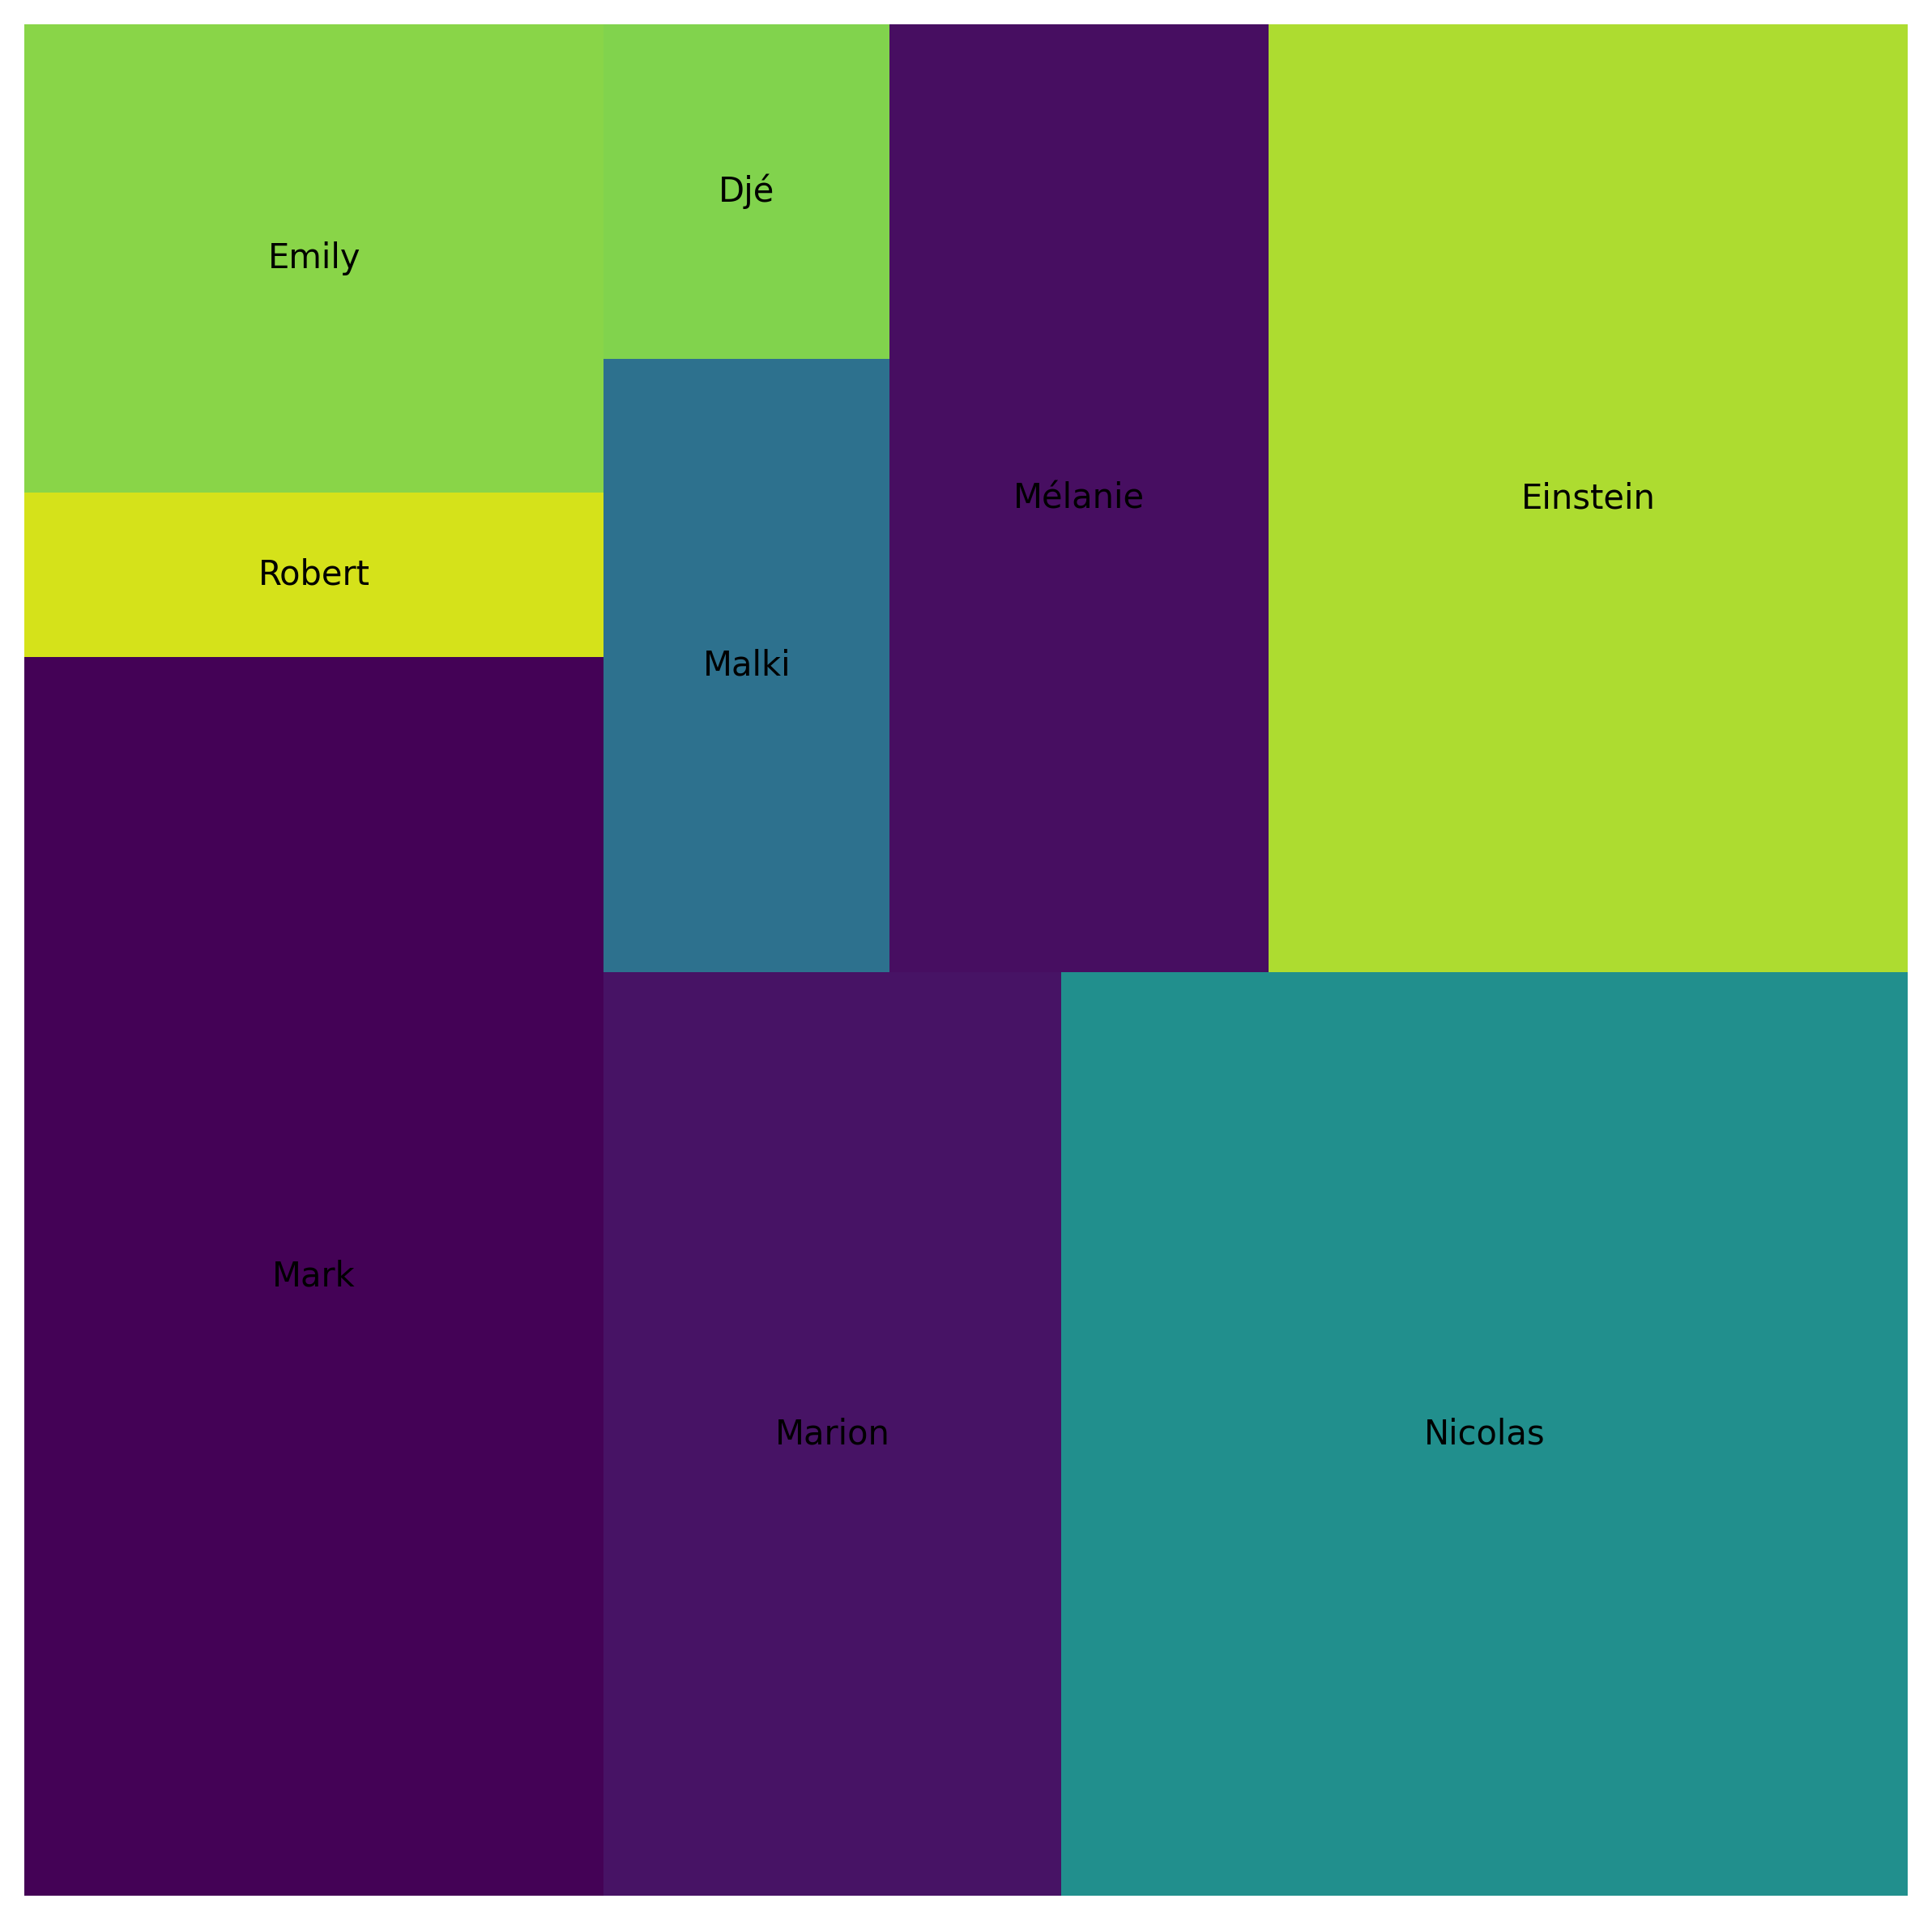

In [2]:
# create a figure
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=df["value"],
   label=df["name"],
   ax=ax
)

# display plot
plt.show()

## Custom colors

Utilizing the convenient [pypalette](https://python-graph-gallery.com/color-palette-finder/) library, you can effortlessly discover a color palette that suits your requirements.

In this instance, we employ the `'Acadia'` palette and subsequently **associate** it with the `parent` column in the dataframe. This process generates a **collection of colors** that will be utilized to enhance the visual appeal of the squares.

Furthermore, we introduce some spacing between the rectangles with the help of `pad=True` and stipulate the preference for white text by using `text_kwargs={'color':'white'}`.

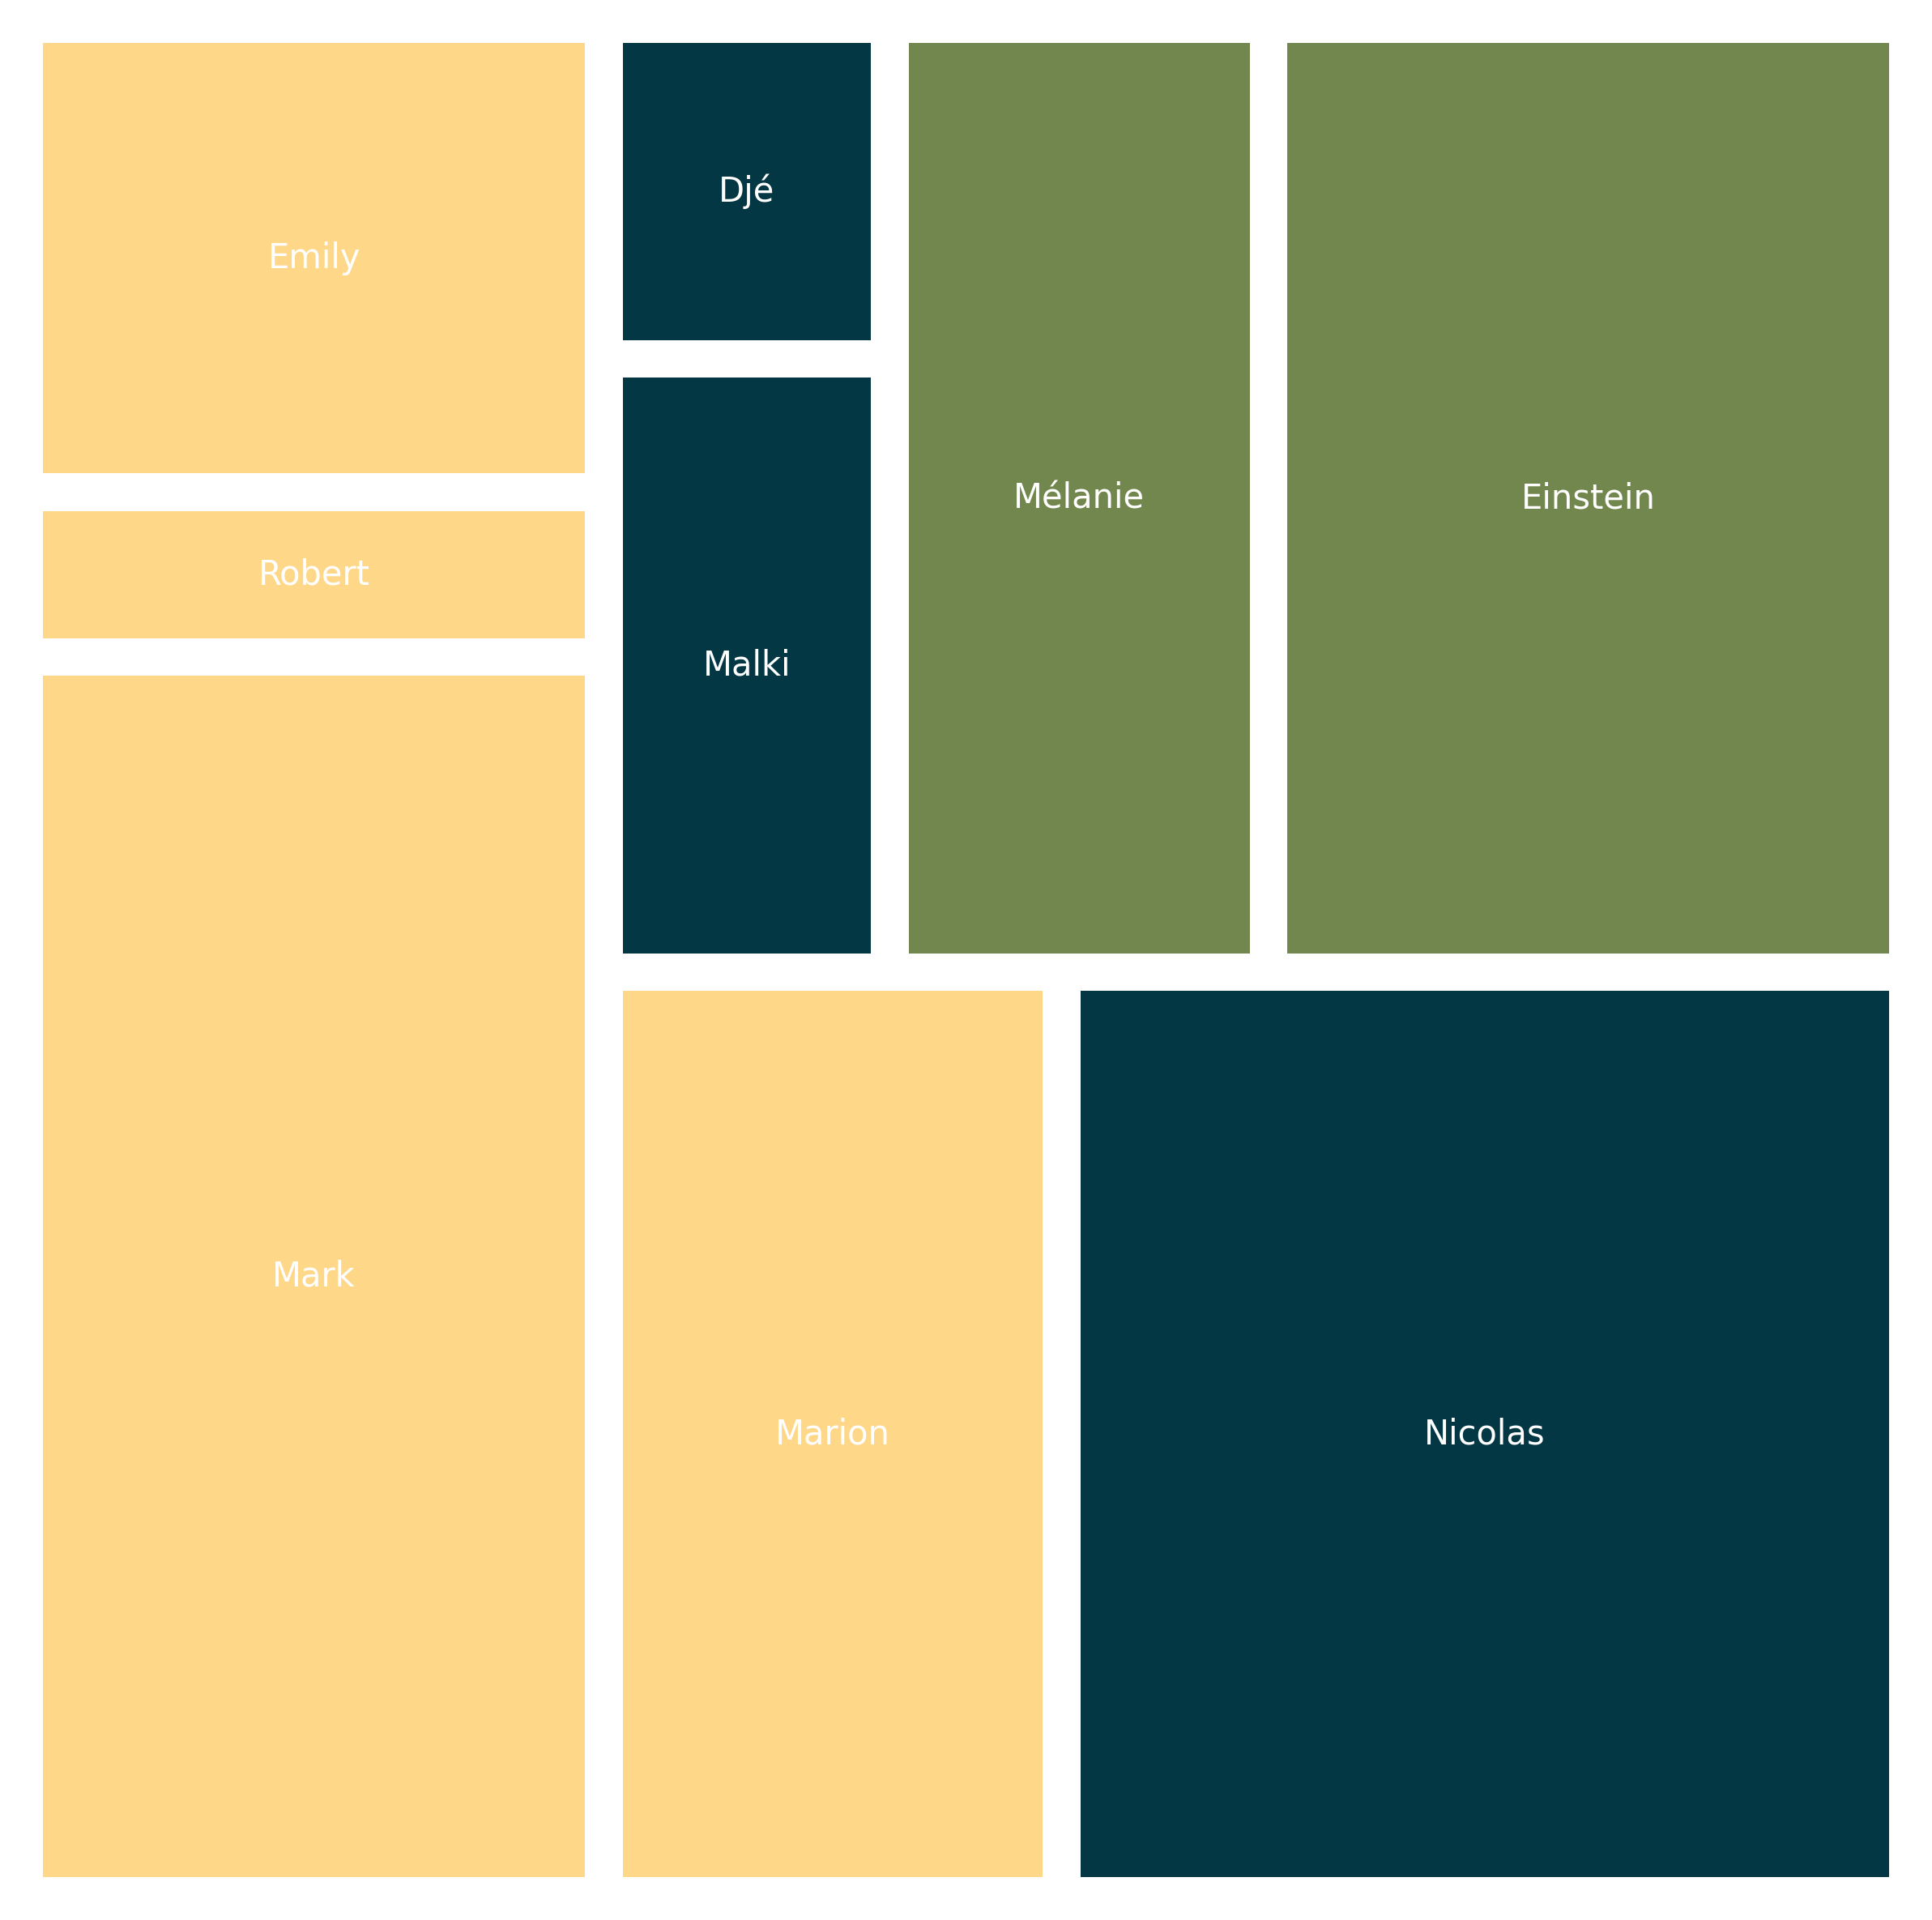

In [3]:
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# create a treemap
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()
squarify.plot(
   sizes=df["value"],
   label=df["name"],
   color=colors,
   text_kwargs={'color':'white'},
   pad=True,
   ax=ax
)
plt.show()

## Custom labels

In place of providing only the column of labels to the `label` argument, we establish a new variable called `labels`. This variable will encompass the `name`, the `parent`, and the `value` of each individual rectangle.

By doing so, we can **present all these pertinent details** on the treemap, enhancing its overall comprehensiveness.

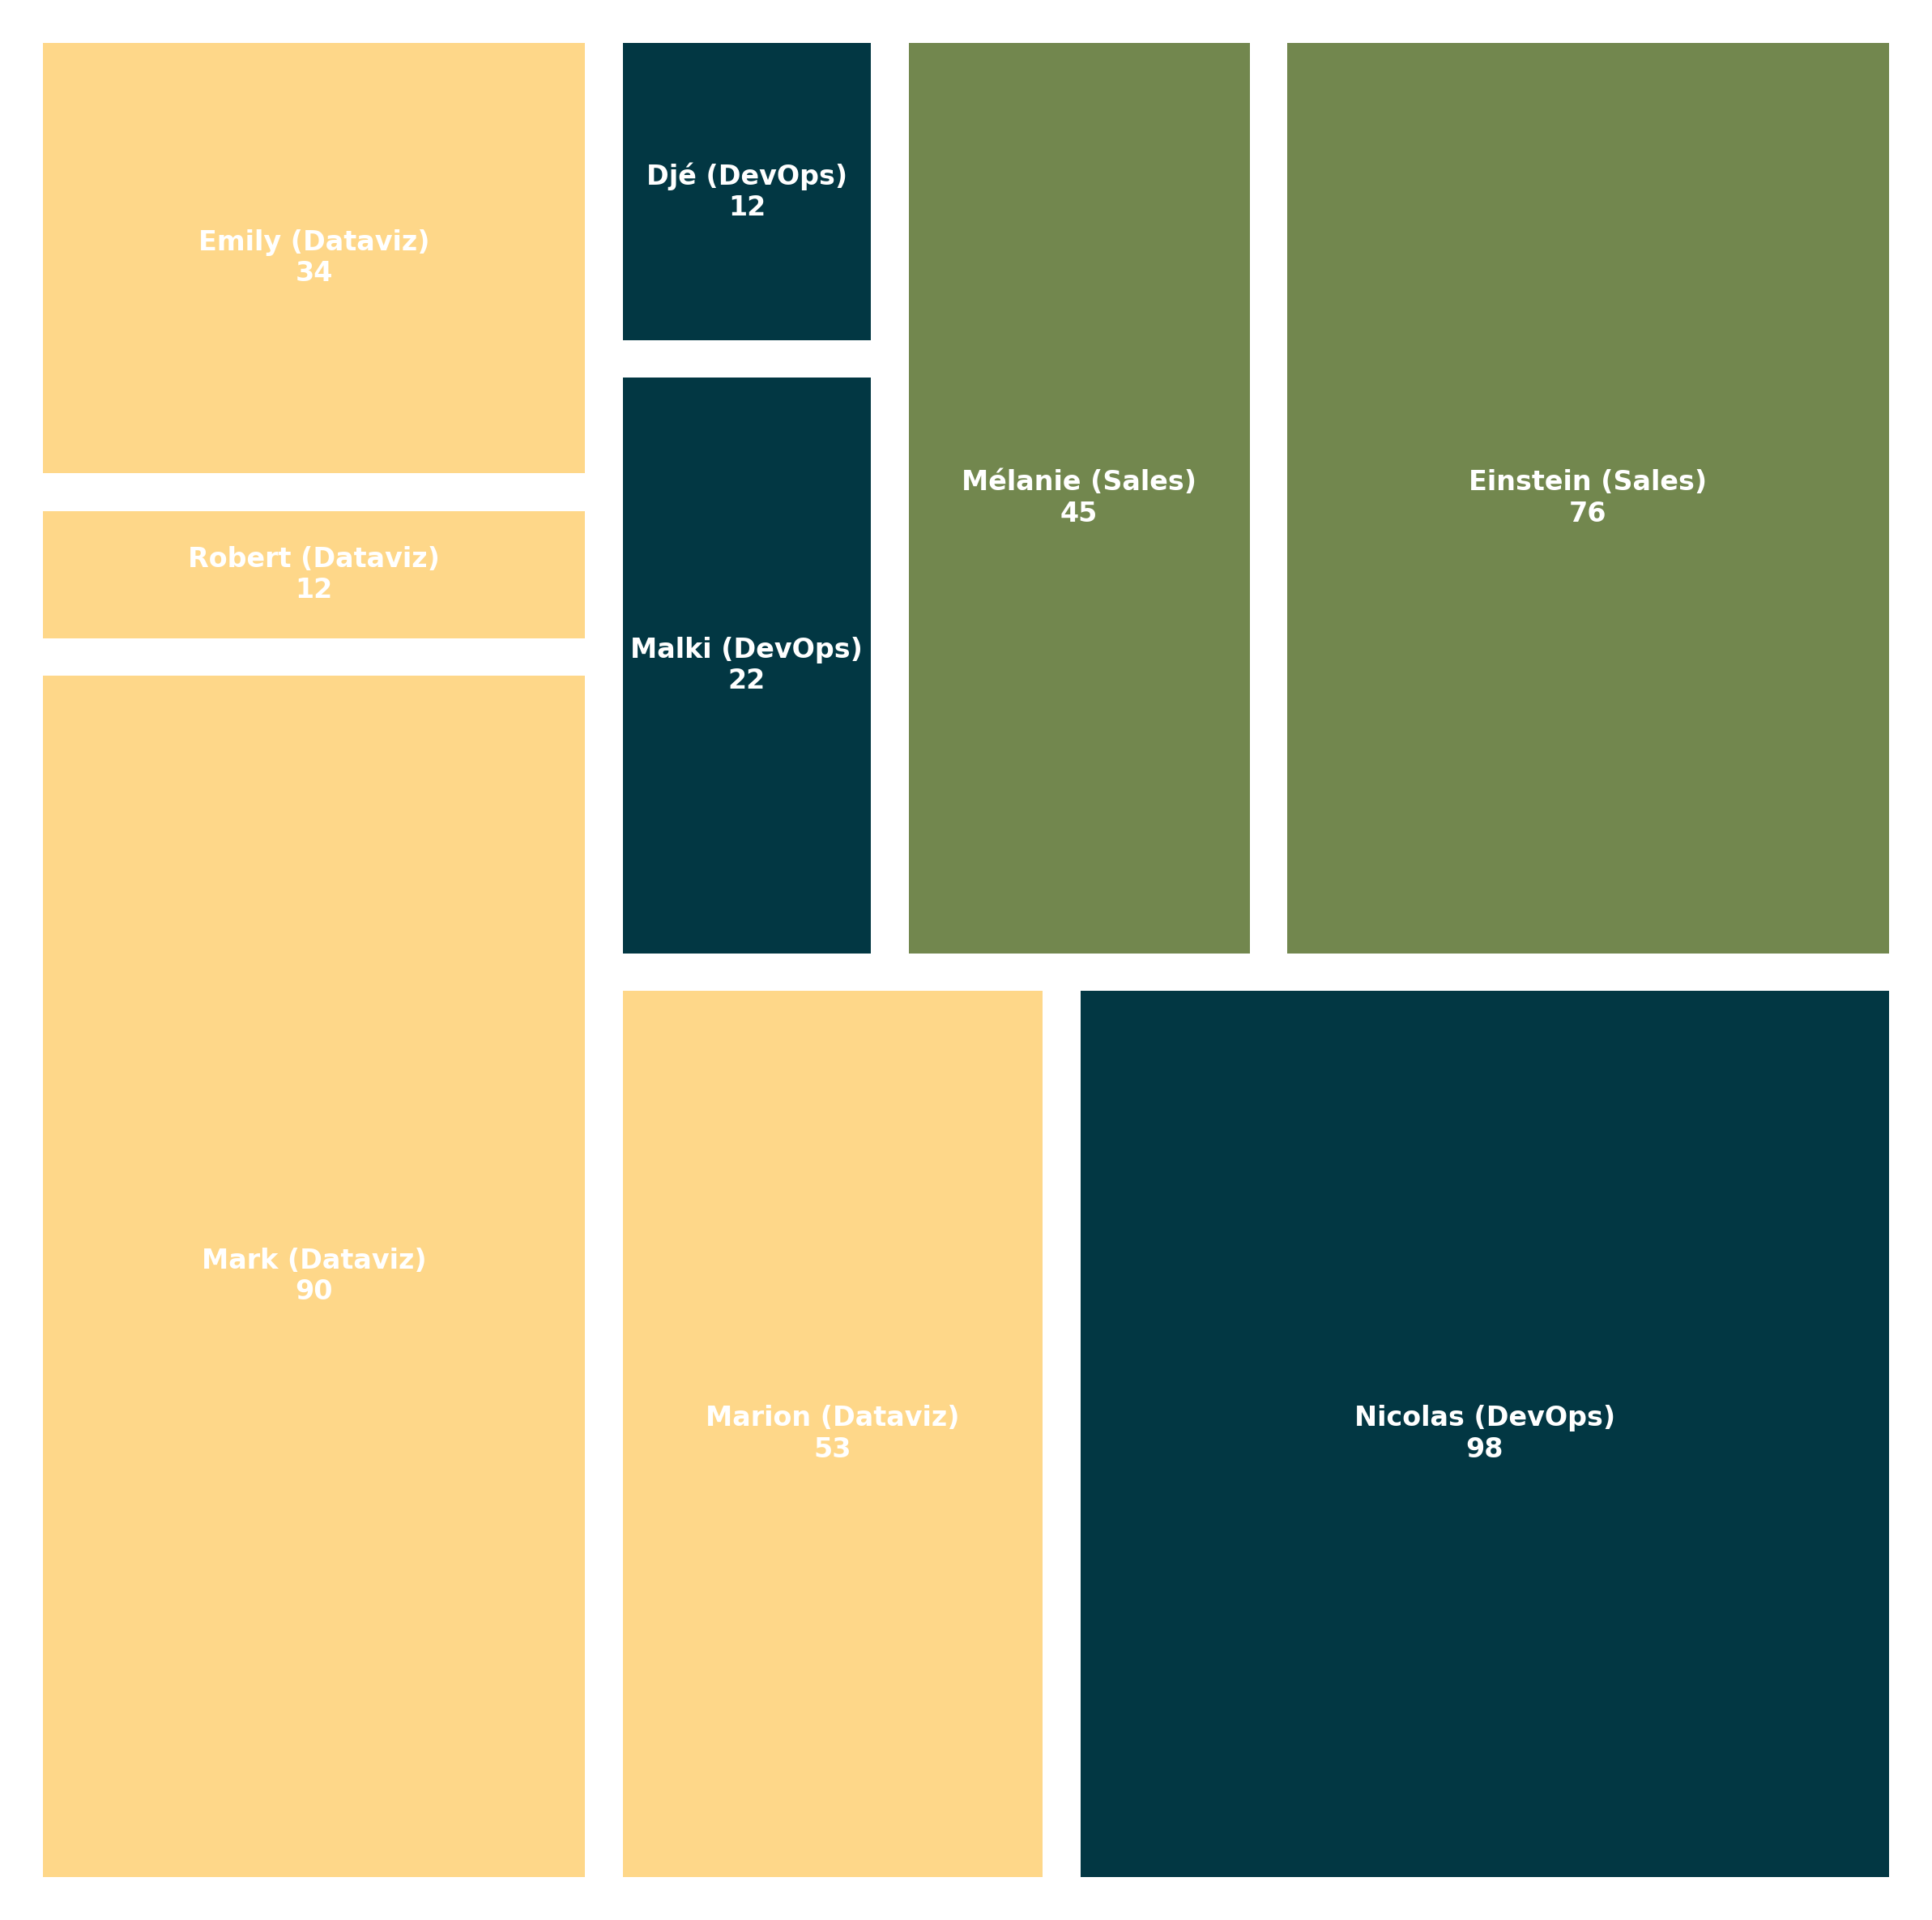

In [4]:
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# customize the labels
labels = [f"{name} ({parent[5:]})\n{value}" for name, value, parent in zip(df['name'], df['value'], df['parent'])]

# create a treemap
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()
squarify.plot(
   sizes=df["value"],
   label=labels,
   color=colors,
   text_kwargs={
      'color':'white',
      'fontsize':8,
      'fontweight':'bold'
   },
   pad=True,
   ax=ax
)
plt.show()

## Legend with `highlight_text`

The [highlight_text](/advanced-custom-annotations-matplotlib/) library offers the capability to incorporate **various styles** within a single string in a matplotlib annotation.

In our particular scenario, we leverage this functionality to introduce a title that **associates colors** with specific categories and their corresponding labels, thereby enhancing the overall clarity and interpretability of the visualization.

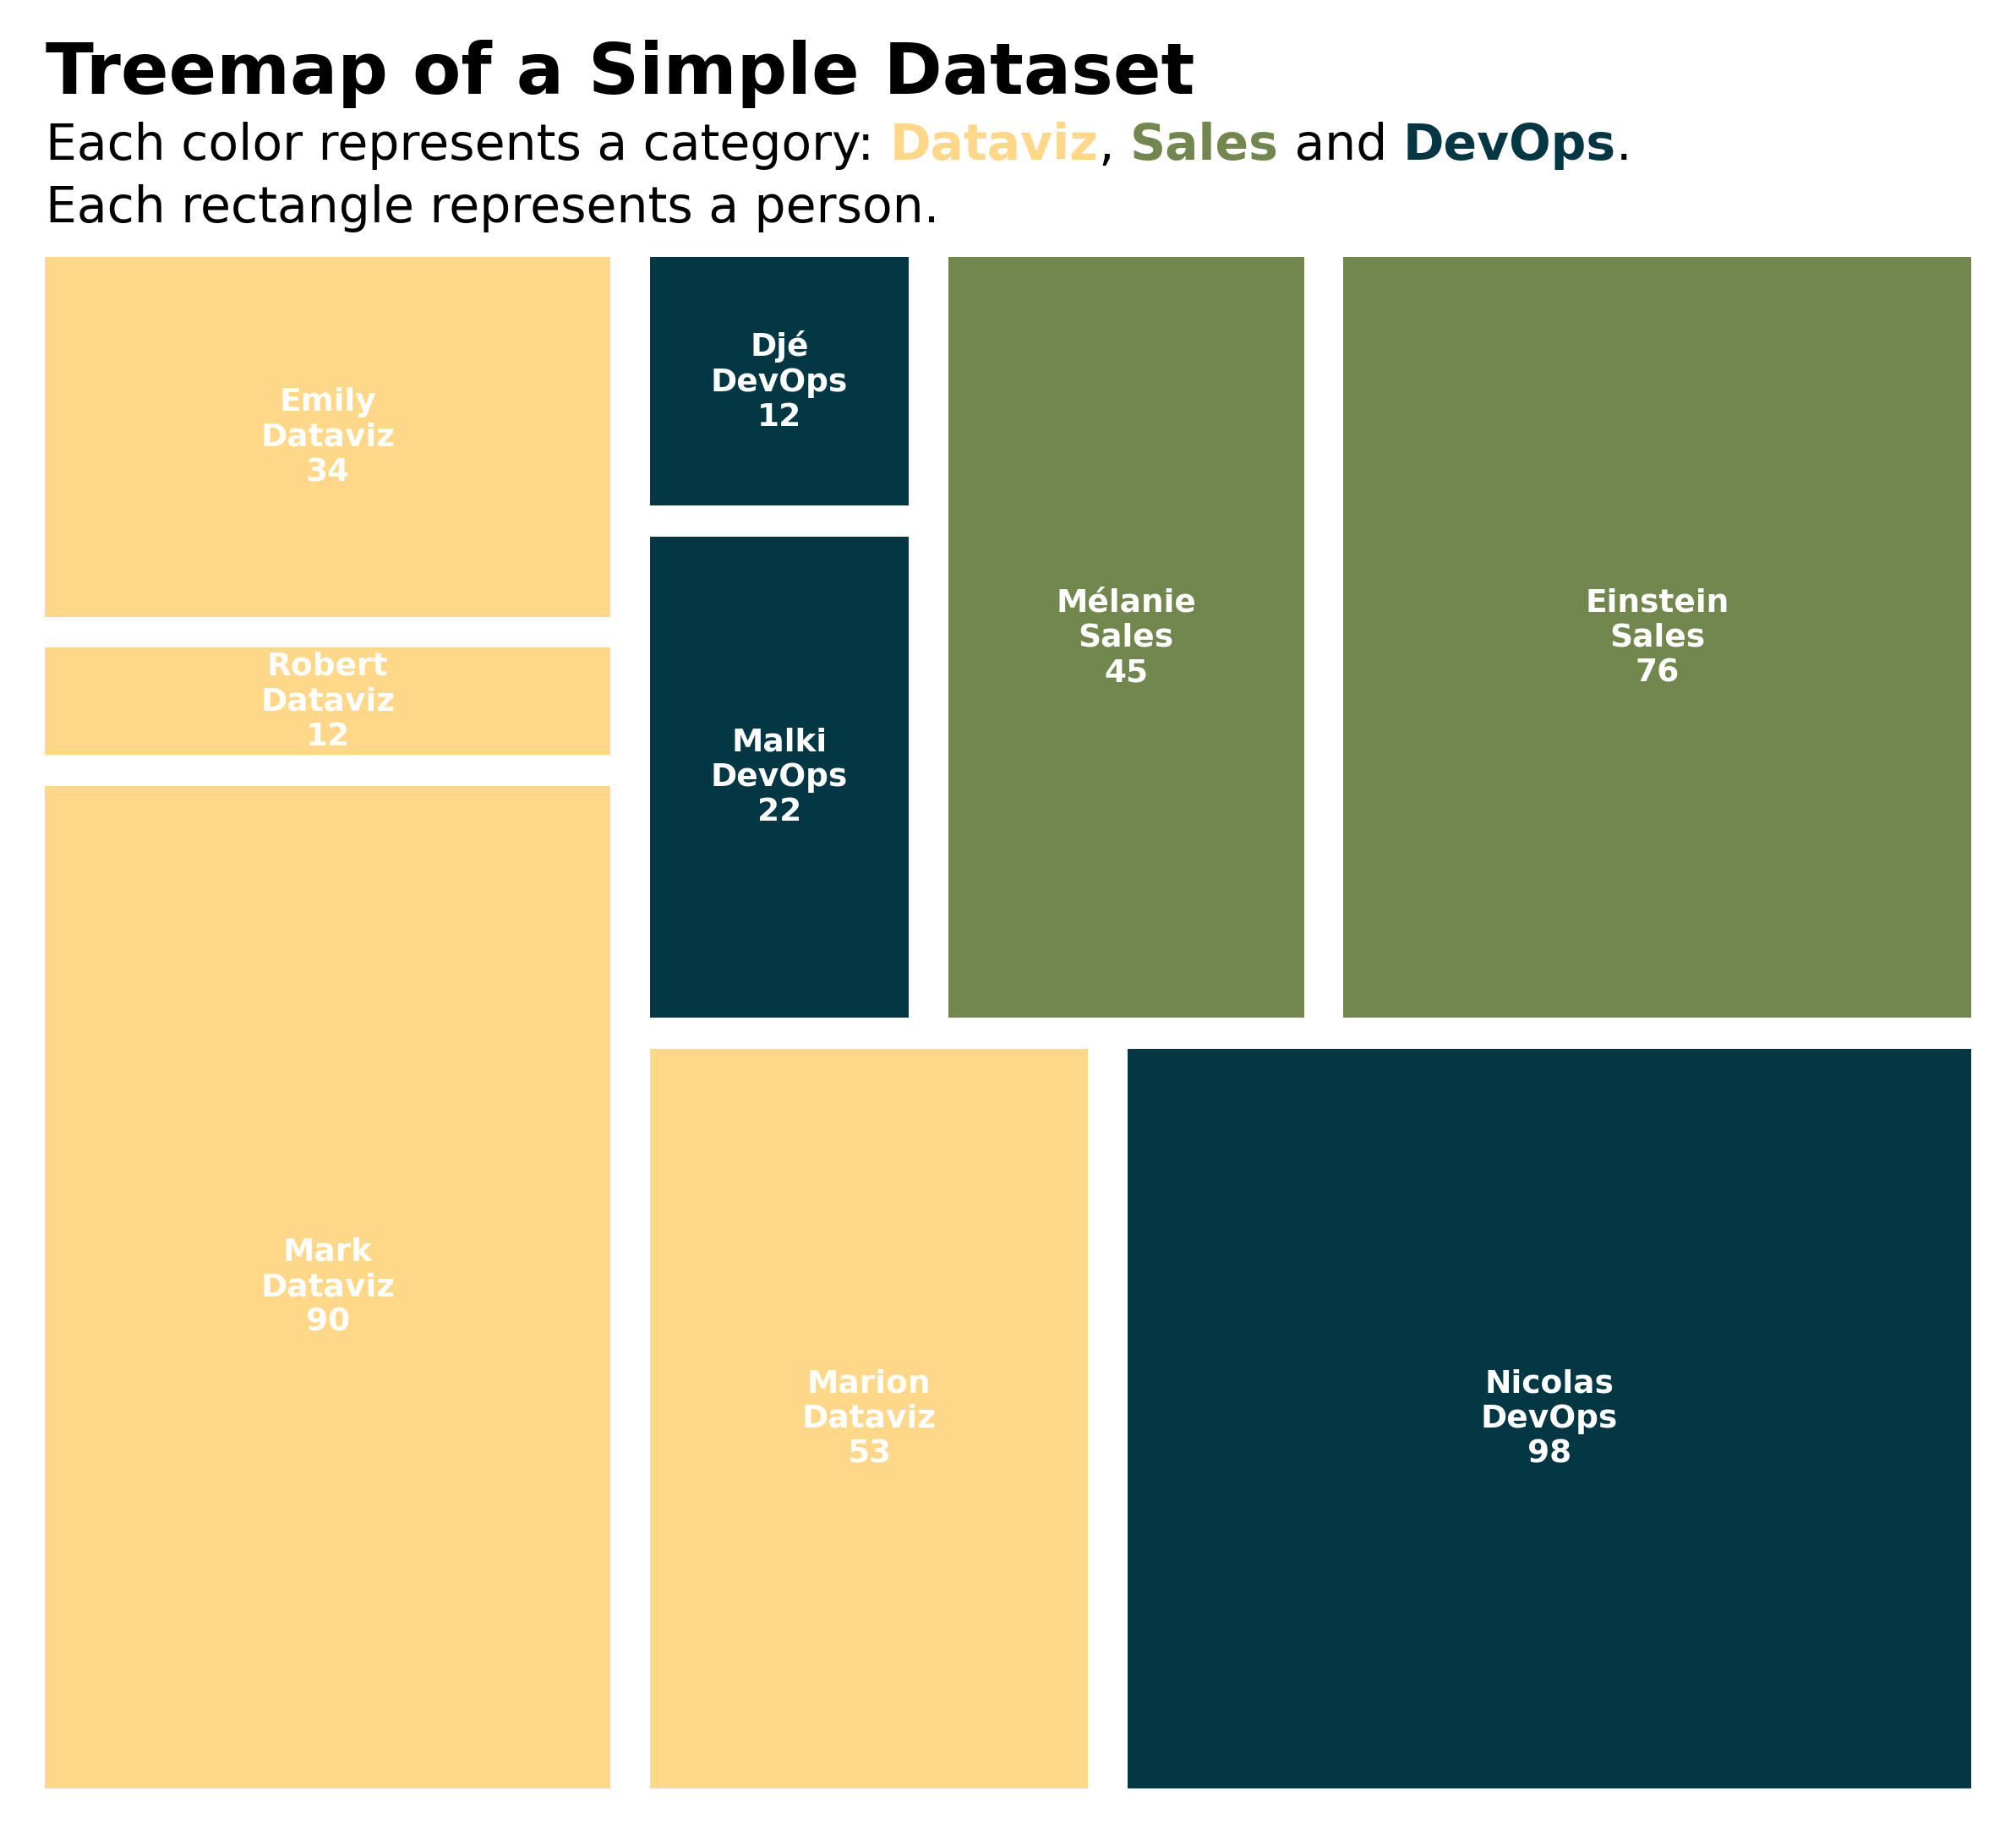

In [5]:
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# customize the labels
labels = [f"{name}\n{parent[5:]}\n{value}" for name, value, parent in zip(df['name'], df['value'], df['parent'])]

# create a treemap
fig, ax = plt.subplots(figsize=(10,8))
ax.set_axis_off()
squarify.plot(
   sizes=df["value"],
   label=labels,
   color=colors,
   text_kwargs={
      'color':'white',
      'fontsize':9,
      'fontweight':'bold'
   },
   pad=True,
   ax=ax
)

# add a title and legend
text = """<Treemap of a Simple Dataset>
Each color represents a category: <Dataviz>, <Sales> and <DevOps>.
Each rectangle represents a person.
"""
fig_text(
   x=0.133, y=0.98,
   s=text,
   color="black",
   highlight_textprops=[
      {"fontsize": 20, 'fontweight': 'bold'},
      {"color": cmap(0), 'fontweight': 'bold'},
      {"color": cmap(2), 'fontweight': 'bold'},
      {"color": cmap(1), 'fontweight': 'bold'},
   ],
   fontsize=14,
   ha='left'
)

plt.show()

## Going further

You might be interested in:

- make the color of the [rectangle proportional to a value](/202-treemap-with-colors-mapped-on-values)
- create an [interactive treemap with plotly](/580-simple-interactive-treemap-plotly)
- the [treemap page](/treemap) of the gallery
